In [4]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [ ]:
asylum = pd.read_csv("asylum_frame.csv")
criminality = pd.read_csv("criminality_frame.csv")
visa = pd.read_csv("visa_frame.csv")
policy = pd.read_csv("policy_frame.csv")
boat = pd.read_csv("boat_frame.csv")

/var/folders/r_/kzyzqy3d39ggsy_pf019hz6m0000gp/T/ipykernel_1446/3107025258.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='M')  # Change freq if necessary
/var/folders/r_/kzyzqy3d39ggsy_pf019hz6m0000gp/T/ipykernel_1446/3107025258.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='M')  # Change freq if necessary
/var/folders/r_/kzyzqy3d39ggsy_pf019hz6m0000gp/T/ipykernel_1446/3107025258.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='M')  # Change freq if necessary
/var/folders/r_/kzyzqy3d39ggsy_pf019hz6m0000gp/T/ipykernel_1446/3107025258.py:35: FutureWarning: 'M' is deprecated and will be removed in a fu

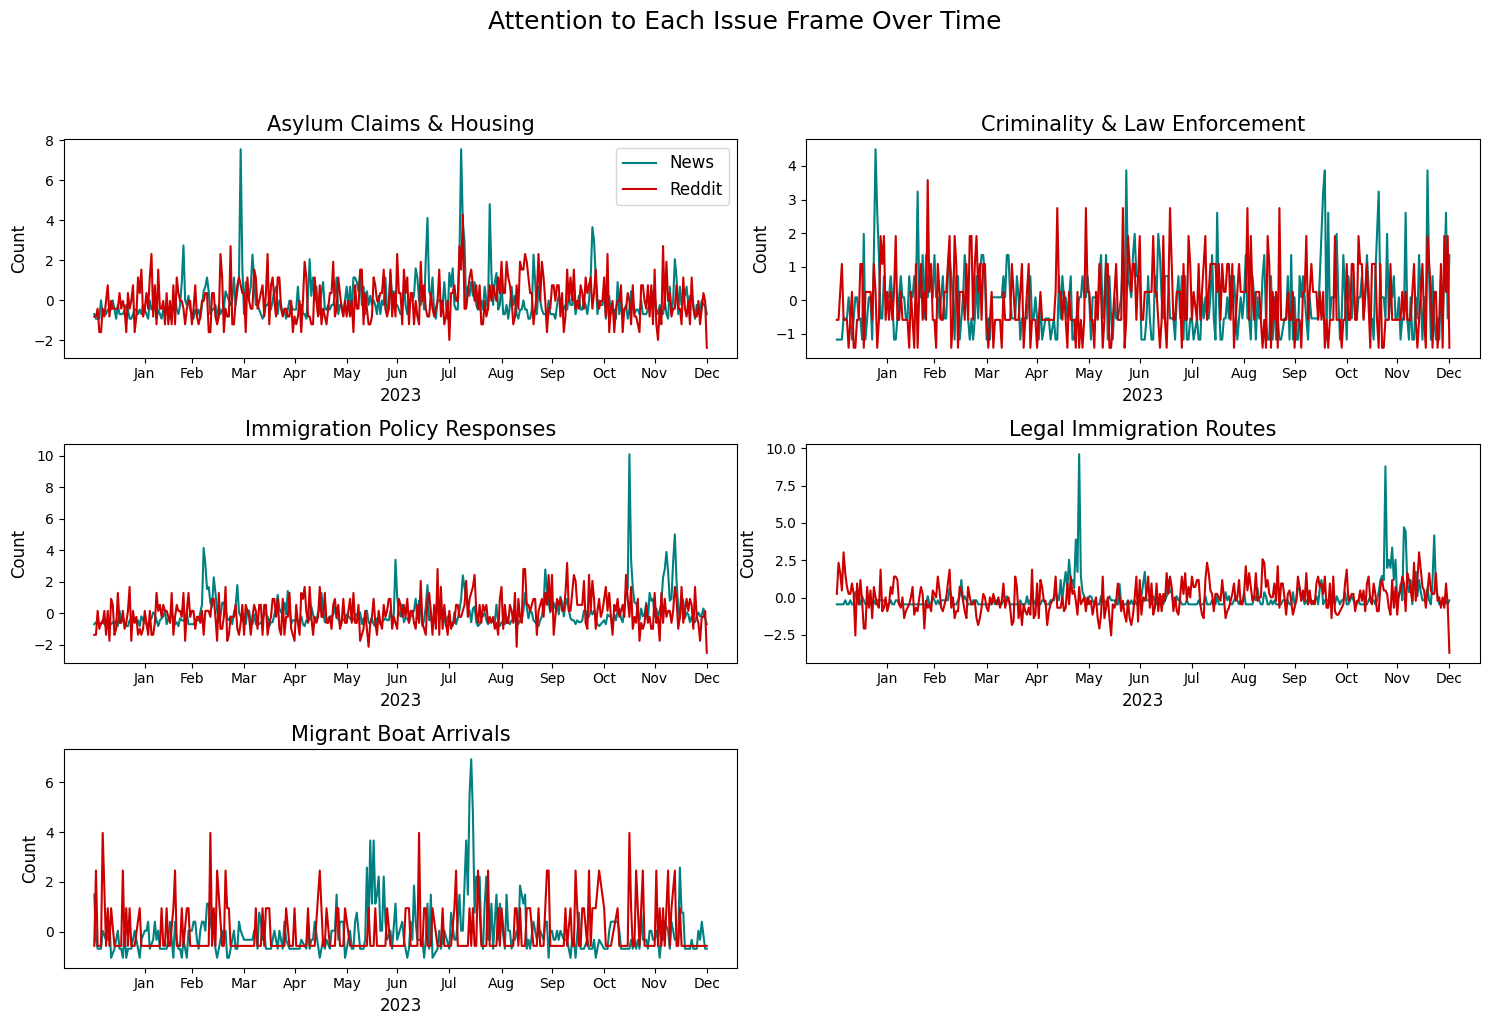

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the index is a DateTimeIndex (assuming your dates are in a column named 'date')
for df in [asylum, criminality, policy, visa, boat]:
    df['date'] = pd.to_datetime(df['date'])  # Convert date column to datetime
    df.set_index('date', inplace=True)  # Set the date column as index

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Titles for each subplot
titles = ['Asylum Claims & Housing',
          'Criminality & Law Enforcement',
          'Immigration Policy Responses',
          'Legal Immigration Routes',
          'Migrant Boat Arrivals']

# DataFrames in the order you want to plot them
dataframes = [asylum, criminality, policy, visa, boat]

# Iterate through the DataFrames and plot them in the appropriate subplot
for i, df in enumerate(dataframes):
    row = i // 2
    col = i % 2
    
    axs[row, col].plot(df.index, df['news'], color='#008080', label='News')
    axs[row, col].plot(df.index, df['reddit'], color='#cc0000', label='Reddit')
    
    axs[row, col].set_title(titles[i], fontsize=15)
    axs[row, col].set_xlabel('2023', fontsize=12)
    axs[row, col].set_ylabel('Count', fontsize=12)
    
    # Set x-axis ticks to the first of each month
    xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq='M')  # Change freq if necessary
    axs[row, col].set_xticks(xticks)
    axs[row, col].set_xticklabels([date.strftime('%b') for date in xticks], fontsize=10)
    
    if i == 0:  # Only show the legend on the first plot
        axs[row, col].legend(fontsize=12)

# Hide the empty subplot (3,2)
axs[2, 1].axis('off')

# Adjust the layout to prevent overlap, giving more space for the y-axis
plt.tight_layout(rect=[0, 0, 1, 0.93])

fig.suptitle('Attention to Each Issue Frame Over Time', fontsize=18, y=1.02)

# Save the figure as a PDF file
plt.savefig('figures/attention.pdf', format='pdf')

# Show the plot
plt.show()

# Cross-Correlations

In [2]:
import pandas as pd
asylum = pd.read_csv("asylum_stat.csv")
criminality = pd.read_csv("criminality_stat.csv")
visa = pd.read_csv("visa_stat.csv")
policy = pd.read_csv("policy_stat.csv")
boat = pd.read_csv("boat_stat.csv")

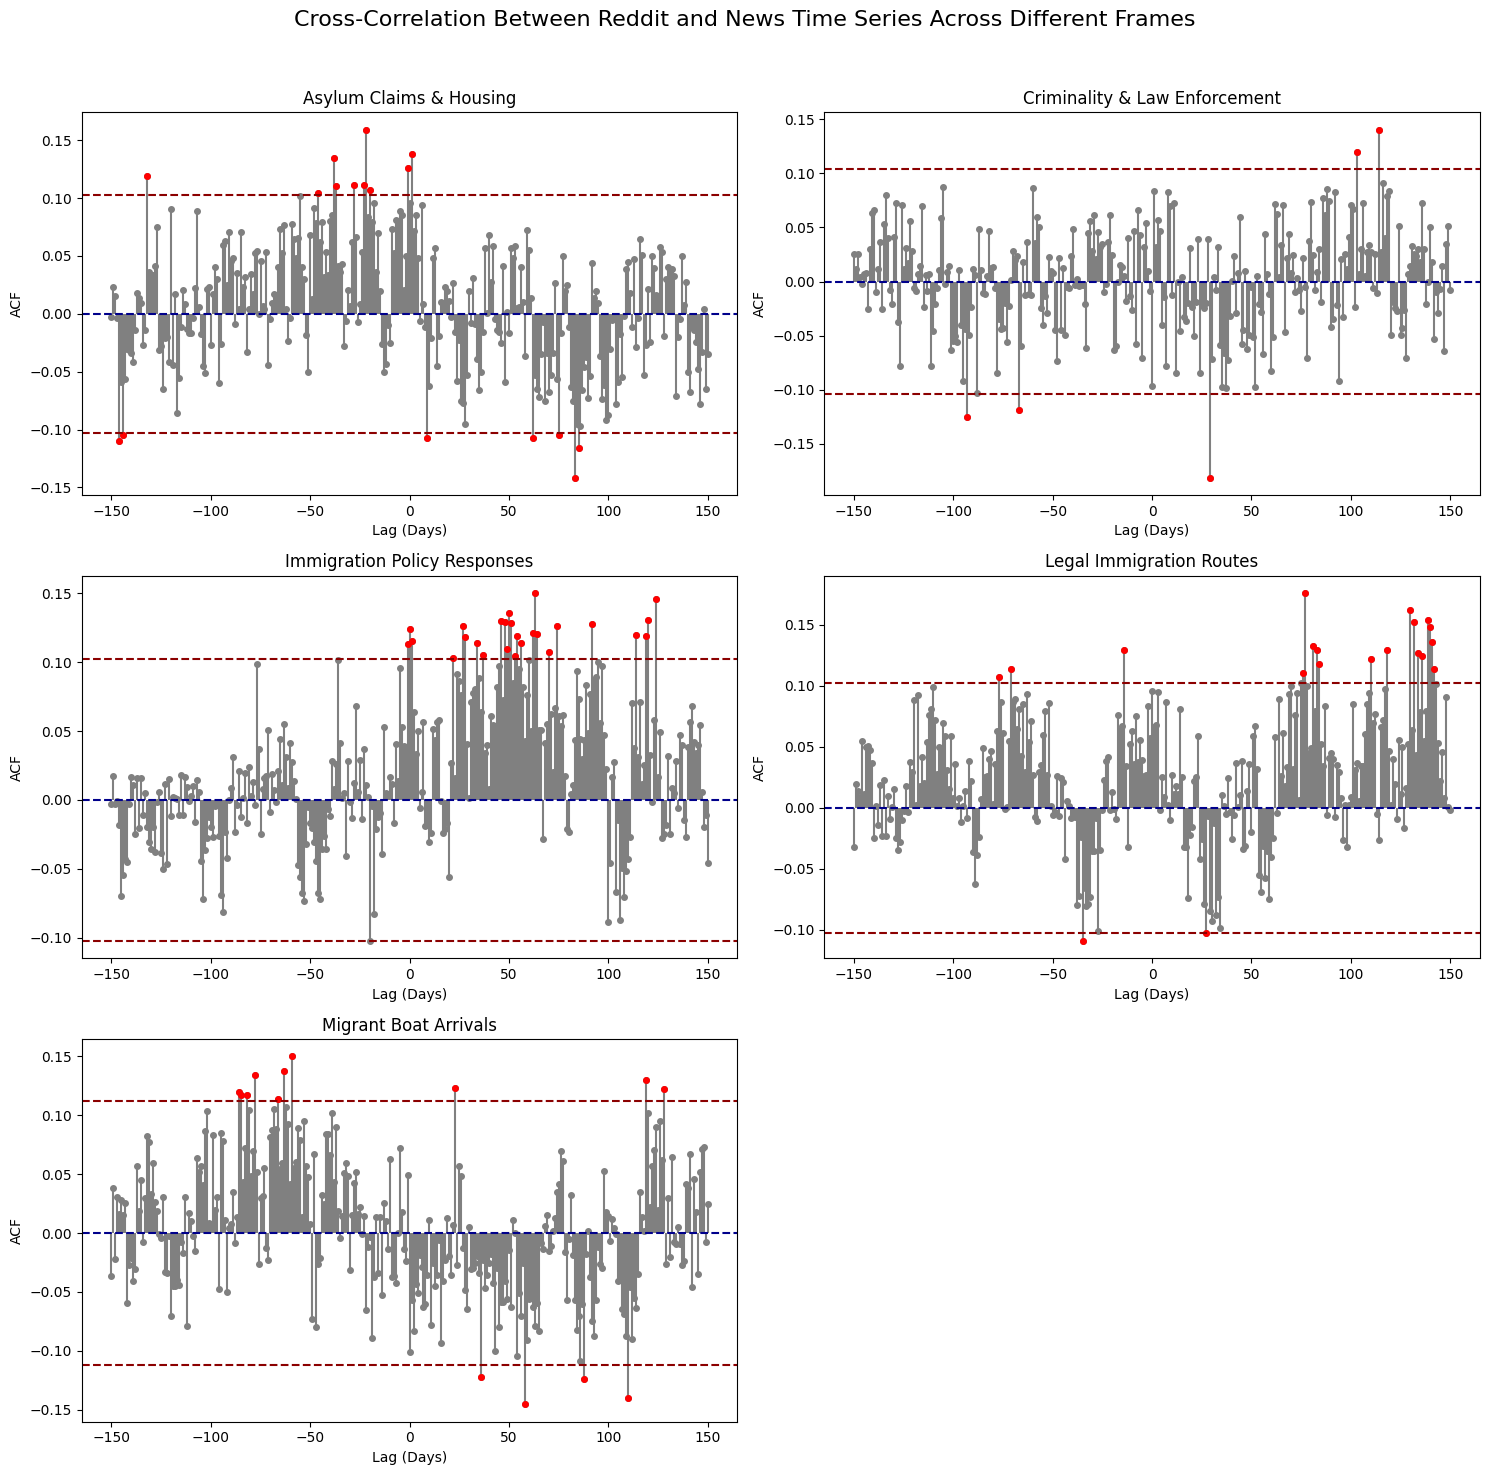

In [3]:
import matplotlib.pylab as plt
import numpy as np
from statsmodels.tsa.stattools import ccf

def plot_cross_correlation(ax, df, col1, col2, title, lag_range=150):
    """
    Plot the cross-correlation between two time series in a dataframe on a given axis.
    
    Parameters:
    ax (matplotlib.axes.Axes): The axis to plot on.
    df (pd.DataFrame): The dataframe containing the time series data.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.
    title (str): The title of the plot.
    lag_range (int): The range of lags to plot. Default is 150.
    """
    # Calculate the cross-correlation
    backwards = ccf(df[col1], df[col2], adjusted=False)[::-1]
    forwards = ccf(df[col2], df[col1], adjusted=False)
    ccf_output = np.r_[backwards[:-1], forwards]

    # Calculate the midpoint of the ccf_output array
    midpoint = len(ccf_output) // 2

    # Extract the relevant portion of ccf_output for the specified lag range
    lag_indices = range(midpoint - lag_range, midpoint + lag_range + 1)
    ccf_subset = ccf_output[lag_indices]
    lags = range(-lag_range, lag_range + 1)

    # Calculate the significance threshold
    threshold = 1.96 / np.sqrt(len(df))
    
    # Create the stem plot with grey color and smaller circles
    (markerline, stemlines, baseline) = ax.stem(
        lags, 
        ccf_subset, 
        linefmt='grey', 
        markerfmt='o', 
        basefmt=" "
    )

    # Adjust marker size here
    markerline.set_markersize(4)  # Smaller size, adjust as needed

    # Highlight significant coefficients
    for i, (lag, coef) in enumerate(zip(lags, ccf_subset)):
        if abs(coef) > threshold:
            ax.plot(lag, coef, 'ro', markersize=4)  # Use smaller red circles for significant coefficients

    # Set the baseline color to grey
    baseline.set_color('grey')

    ax.set_xlabel('Lag (Days)')
    ax.set_ylabel('ACF')
    ax.set_title(title)

    # 95% UCL / LCL
    ax.axhline(-threshold, color='darkred', ls='--') 
    ax.axhline(threshold, color='darkred', ls='--')
    ax.axhline(y=0, linestyle='--', color='darkblue')

# Define the dataframes and their titles
dataframes = [
    (asylum, 'reddit', 'news', 'Asylum Claims & Housing'),
    (criminality, 'reddit', 'news', 'Criminality & Law Enforcement'),
    (policy, 'reddit', 'news', 'Immigration Policy Responses'),
    (visa, 'reddit', 'news', 'Legal Immigration Routes'),
    (boat, 'reddit', 'news', 'Migrant Boat Arrivals')
]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

# Loop through the dataframes and plot the cross-correlation
for ax, (df, col1, col2, title) in zip(axes, dataframes):
    plot_cross_correlation(ax, df, col1, col2, title)

# Hide the last subplot if there are an odd number of plots
if len(dataframes) % 2 != 0:
    axes[-1].axis('off')

# Add an overarching title
fig.suptitle('Cross-Correlation Between Reddit and News Time Series Across Different Frames', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 

# Save the figure as a PDF file
plt.savefig('figures/cross_correlation_plot.pdf', format='pdf')

plt.show()

# VAR & Granger Causality

In [2]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, columns):
    """
    Check if the time series in the specified columns are stationary using the Augmented Dickey-Fuller test.
    
    Parameters:
    data (DataFrame): DataFrame containing the time series data.
    columns (list): List of column names to be checked for stationarity.
    
    Returns:
    dict: A dictionary with column names as keys and a dictionary of ADF test results as values.
    """
    results = {}
    for column in columns:
        result = adfuller(data[column])
        results[column] = {
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Critical Values': result[4]
        }
        print(f"\nResults for {column}:")
        print(f"ADF Statistic: {result[0]}")
        print(f"p-value: {result[1]}")
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value}')
    return results

## Asylum Claims and Housing

### Creating the Time Series

In [ ]:
news = pd.read_csv("news_framed.csv")
reddit = pd.read_csv("reddit_framed.csv")

In [ ]:
# asylum claims
asylum_news = news[news['frame']=='asylum']
asylum_reddit = reddit[reddit['frame']=='asylum']

asylum_frame = pd.concat([asylum_news, asylum_reddit], ignore_index=True)

In [ ]:
# add column called media which is 'news' if column news is not null, 'reddit' otherwise

asylum_frame['media'] = asylum_frame['news'].apply(lambda x: 'news' if pd.notnull(x) else 'reddit')

In [ ]:
# keep only relevant columns
asylum_frame = asylum_frame[['date', 'media']]

In [ ]:
# Step 1: Add a count column
asylum_frame['count'] = 1

# Step 2: Pivot the data frame
asylum = asylum_frame.pivot_table(index='date', columns='media', values='count', aggfunc='sum', fill_value=0)

# Step 3: Reset the index to make 'date' a column again
asylum = asylum.reset_index()

### CHECKPOINT: Save Asylum Frame

In [ ]:
# save to csv
asylum.to_csv("asylum_frame.csv", index=False)

### Load Asylum Frame

In [3]:
# load 
asylum = pd.read_csv("asylum_frame.csv", index_col=0, parse_dates=True)

In [5]:
asylum = asylum.asfreq(pd.infer_freq(asylum.index))

**Test for Stationarity with ADF**

In [6]:
asylum_results = check_stationarity(asylum, ['news', 'reddit'])


Results for news:
ADF Statistic: -12.217128092539449
p-value: 1.128917080613392e-22
Critical Value (1%): -3.4484434475193777
Critical Value (5%): -2.869513170510808
Critical Value (10%): -2.571017574266393

Results for reddit:
ADF Statistic: -11.631822466891261
p-value: 2.2529956431494444e-21
Critical Value (1%): -3.448493650810824
Critical Value (5%): -2.8695352280356556
Critical Value (10%): -2.5710293341377715


### Normalise

In [6]:
avgs = asylum.mean()
devs = asylum.std()
for col in asylum.columns:
    asylum[col] = (asylum[col] - avgs.loc[col]) / devs.loc[col]

### CHECKPOINT: Save Stationary Asylum Frame

In [8]:
# save new asylum
asylum.to_csv("asylum_stat.csv")

### Remove first difference

In [8]:
asylum = asylum.diff().dropna()

### Remove weekly volatility

In [10]:
# Calculate weekly volatility
weekly_volatility = asylum.groupby(asylum.index.isocalendar().week).std()

# Map weekly volatility back to each day in asylum dataframe
asylum['news_weekly_vol'] = asylum.index.map(lambda d: weekly_volatility.loc[d.week, 'news'])
asylum['reddit_weekly_vol'] = asylum.index.map(lambda d: weekly_volatility.loc[d.week, 'reddit'])

# Normalize by weekly volatility
asylum['news'] = asylum['news'] / asylum['news_weekly_vol']
asylum['reddit'] = asylum['reddit'] / asylum['reddit_weekly_vol']

In [ ]:
#monthly_volatility = asylum.groupby(asylum.index.month).std()

#asylum['news_monthly_vol'] = asylum.index.map(lambda d: monthly_volatility.loc[d.month, 'news'])
#asylum['reddit_monthly_vol'] = asylum.index.map(lambda d: monthly_volatility.loc[d.month, 'reddit'])

#asylum['news'] = asylum['news'] / asylum['news_monthly_vol']
#asylum['reddit'] = asylum['reddit'] / asylum['reddit_monthly_vol']

### Check Stationarity

In [9]:
asylum_results = check_stationarity(asylum, ['news', 'reddit'])


Results for news:
ADF Statistic: -12.217128092539445
p-value: 1.1289170806134405e-22
Critical Value (1%): -3.4484434475193777
Critical Value (5%): -2.869513170510808
Critical Value (10%): -2.571017574266393

Results for reddit:
ADF Statistic: -11.631822466891276
p-value: 2.252995643149314e-21
Critical Value (1%): -3.448493650810824
Critical Value (5%): -2.8695352280356556
Critical Value (10%): -2.5710293341377715


They are stationary.

In [10]:
asylum = asylum[['news', 'reddit']]
model = VAR(asylum)
lag_order = model.select_order(maxlags=14)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,0.03404,0.05604,1.035,0.04279
1,-0.1474*,-0.08138*,0.8630*,-0.1211*
2,-0.1324,-0.02238,0.8760,-0.08860
3,-0.1168,0.03719,0.8898,-0.05552
4,-0.1003,0.09766,0.9046,-0.02154
5,-0.08927,0.1527,0.9146,0.007039
6,-0.08901,0.1970,0.9149,0.02481
7,-0.07554,0.2544,0.9273,0.05579
8,-0.06221,0.3118,0.9398,0.08663
9,-0.06121,0.3568,0.9408,0.1051


#### PACF - Reddit

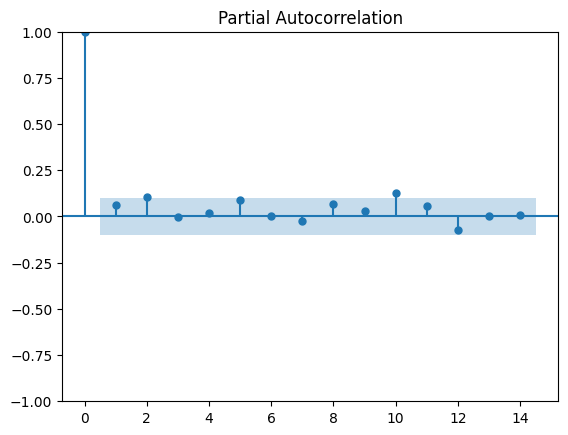

In [11]:
plot_pacf(asylum['reddit'], lags=14)
plt.show()

Consider AR(1)

#### Correlation between Reddit and Lagged News

In [12]:
for lag in range(1, 14):
    reddit_series = asylum['reddit'].iloc[lag:]
    lagged_news_series = asylum['news'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(reddit_series, lagged_news_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.12627956861980272, pvalue=0.015924926712446292)
------
Lag: 2
PearsonRResult(statistic=0.0504951724339981, pvalue=0.3373793190124405)
------
Lag: 3
PearsonRResult(statistic=0.020669810574158305, pvalue=0.6950938967969863)
------
Lag: 4
PearsonRResult(statistic=0.0860349829845173, pvalue=0.10267469289158444)
------
Lag: 5
PearsonRResult(statistic=0.09003973922407696, pvalue=0.08802500877465601)
------
Lag: 6
PearsonRResult(statistic=0.08010740405688258, pvalue=0.12978231808036428)
------
Lag: 7
PearsonRResult(statistic=0.08239265769920978, pvalue=0.11967549756667988)
------
Lag: 8
PearsonRResult(statistic=0.053247814797626275, pvalue=0.3157299623843479)
------
Lag: 9
PearsonRResult(statistic=0.07422480088614401, pvalue=0.16227116021597798)
------
Lag: 10
PearsonRResult(statistic=-0.025506309020258848, pvalue=0.6319680095539147)
------
Lag: 11
PearsonRResult(statistic=-0.009762006881780827, pvalue=0.8547777652749871)
------
Lag: 12
PearsonRResult(statist

### Run the Model

**With Controls**

In [4]:
import pandas as pd
from statsmodels.tsa.api import VAR
from io import StringIO
import sys

# Load the dataset
asylum = pd.read_csv("asylum_stat.csv", index_col=0, parse_dates=True)
asylum = asylum[['news', 'reddit']]

# Create a new column for the day of the week
asylum['day_of_week'] = asylum.index.dayofweek

# Create dummy variables
dummies = pd.get_dummies(asylum['day_of_week'], prefix='day', drop_first=True)

# Concatenate dummy variables with the original dataset
asylum = pd.concat([asylum, dummies], axis=1)

# Convert boolean dummy variables to numeric
for col in dummies.columns:
    asylum[col] = asylum[col].astype(int)

# Ensure all columns are numeric
asylum = asylum.apply(pd.to_numeric, errors='coerce')

# Separate endogenous variables (including dummies)
endog_vars = asylum[['news', 'reddit'] + dummies.columns.tolist()]

# Fit the VAR model
model = VAR(endog_vars)
model_fit = model.fit(maxlags=1)

# Capture the summary output as a string
summary_str = StringIO()
sys.stdout = summary_str
print(model_fit.summary())
sys.stdout = sys.__stdout__

# Format the captured text into HTML
html_summary = f"<html><body><pre>{summary_str.getvalue()}</pre></body></html>"

# Save the HTML content to a file
with open('asylum_reg.html', 'w') as file:
    file.write(html_summary)

/Volumes/mramn/venvmr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:465: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Granger Causality

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# reddit granger caused by news
# dependent variable: reddit
reddit_df = pd.DataFrame(columns=['reddit','news'], data=asylum)
gc_reddit = grangercausalitytests(reddit_df, 1) 



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3922  , p=0.0208  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=5.4370  , p=0.0197  , df=1
likelihood ratio test: chi2=5.3968  , p=0.0202  , df=1
parameter F test:         F=5.3922  , p=0.0208  , df_denom=361, df_num=1


In [18]:
# news granger caused by reddit
# dependent variable: news
news_df = pd.DataFrame(columns=['news','reddit'], data=asylum)
gc_news = grangercausalitytests(news_df, 1) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.5196  , p=0.0342  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=4.5571  , p=0.0328  , df=1
likelihood ratio test: chi2=4.5288  , p=0.0333  , df=1
parameter F test:         F=4.5196  , p=0.0342  , df_denom=361, df_num=1


## Criminality and Law Enforcement

### Creating the Time Series

In [ ]:
# visa frame
criminality_news = news[news['frame']=='criminality']
criminality_reddit = reddit[reddit['frame']=='criminality']

criminality_frame = pd.concat([criminality_news, criminality_reddit], ignore_index=True)

In [ ]:
# add column called media which is 'news' if column news is not null, 'reddit' otherwise

criminality_frame['media'] = criminality_frame['news'].apply(lambda x: 'news' if pd.notnull(x) else 'reddit')

In [ ]:
# keep only relevant columns
criminality_frame = criminality_frame[['date', 'media']]

In [ ]:
# Step 1: Add a count column
criminality_frame['count'] = 1

# Step 2: Pivot the data frame
criminality = criminality_frame.pivot_table(index='date', columns='media', values='count', aggfunc='sum', fill_value=0)

# Step 3: Reset the index to make 'date' a column again (optional, if you prefer it as an index you can skip this)
criminality = criminality.reset_index()

### CHECKPOINT: Save Criminality Frame

In [ ]:
criminality.to_csv("criminality_frame.csv", index=False)

### Load Criminality Frame

In [17]:
criminality = pd.read_csv("criminality_frame.csv", index_col=0, parse_dates=True)

In [19]:
criminality_results = check_stationarity(criminality, ['news', 'reddit'])


Results for news:
ADF Statistic: -15.553223500369416
p-value: 2.087175674682994e-28
Critical Value (1%): -3.4490114443793214
Critical Value (5%): -2.8697627072503757
Critical Value (10%): -2.5711506161673716

Results for reddit:
ADF Statistic: -6.685056743160843
p-value: 4.2466830731421335e-09
Critical Value (1%): -3.449226932880019
Critical Value (5%): -2.869857365438656
Critical Value (10%): -2.571201085130664


### Normalise

In [20]:
avgs = criminality.mean()
devs = criminality.std()
for col in criminality.columns:
    criminality[col] = (criminality[col] - avgs.loc[col]) / devs.loc[col]

**Test for Stationarity with ADF**

In [21]:
criminality_results = check_stationarity(criminality, ['news', 'reddit'])


Results for news:
ADF Statistic: -15.553223500369418
p-value: 2.087175674682994e-28
Critical Value (1%): -3.4490114443793214
Critical Value (5%): -2.8697627072503757
Critical Value (10%): -2.5711506161673716

Results for reddit:
ADF Statistic: -6.685056743160843
p-value: 4.2466830731421335e-09
Critical Value (1%): -3.449226932880019
Critical Value (5%): -2.869857365438656
Critical Value (10%): -2.571201085130664


They are stationary.

### CHECKPOINT: Save stationary Criminality Frame

In [25]:
criminality.to_csv("criminality_stat.csv")

### Load Stationary Criminality Frame

In [33]:
criminality = pd.read_csv("criminality_stat.csv")

In [22]:
criminality = criminality[['news', 'reddit']]
model = VAR(criminality)
lag_order = model.select_order(maxlags=14)
lag_order.summary()

/Volumes/mramn/venvmr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,0.01973,0.04225*,1.020,0.02870*
1,0.004953*,0.07252,1.005*,0.03188
2,0.02391,0.1365,1.024,0.06879
3,0.03863,0.1963,1.039,0.1014
4,0.04221,0.2449,1.043,0.1230
5,0.04749,0.2952,1.049,0.1462
6,0.06598,0.3588,1.068,0.1827
7,0.07791,0.4158,1.081,0.2125
8,0.07977,0.4627,1.083,0.2323
9,0.09727,0.5252,1.102,0.2678


### PACF - Reddit

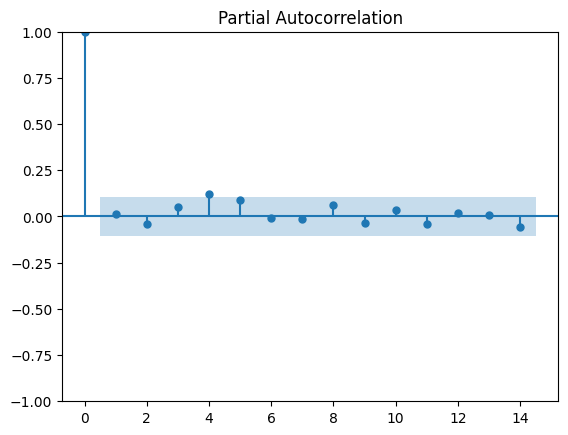

In [23]:
plot_pacf(criminality['reddit'], lags=14)
plt.show()

Consider AR(1)

### Correlation between Reddit and Lagged News

In [26]:
for lag in range(1, 14):
    reddit_series = criminality['reddit'].iloc[lag:]
    lagged_news_series = criminality['news'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(reddit_series, lagged_news_series))
    print('------')

Lag: 1
PearsonRResult(statistic=-0.008792778444834577, pvalue=0.8692442335913713)
------
Lag: 2
PearsonRResult(statistic=0.009654065622401911, pvalue=0.8567708287448812)
------
Lag: 3
PearsonRResult(statistic=0.05446854946425462, pvalue=0.30887597316548415)
------
Lag: 4
PearsonRResult(statistic=0.032743529102303714, pvalue=0.5414990541720215)
------
Lag: 5
PearsonRResult(statistic=-0.07213939573110723, pvalue=0.17875681300252297)
------
Lag: 6
PearsonRResult(statistic=0.04372573771522113, pvalue=0.4161336356717907)
------
Lag: 7
PearsonRResult(statistic=0.06800626021362655, pvalue=0.2063346136069007)
------
Lag: 8
PearsonRResult(statistic=-0.058852427030358895, pvalue=0.27496348241656127)
------
Lag: 9
PearsonRResult(statistic=0.04834540911814194, pvalue=0.3706584135414371)
------
Lag: 10
PearsonRResult(statistic=-0.026984174177706006, pvalue=0.6179547791351616)
------
Lag: 11
PearsonRResult(statistic=-0.013338370445073869, pvalue=0.8055744329933646)
------
Lag: 12
PearsonRResult(stat

### Run VAR Model

**With Controls**

In [3]:
from io import StringIO  
import sys
import pandas as pd
from statsmodels.tsa.api import VAR

# Load the dataset
criminality = pd.read_csv("criminality_stat.csv", index_col=0, parse_dates=True)
criminality = criminality[['news', 'reddit']]

# Create a new column for the day of the week
criminality['day_of_week'] = criminality.index.dayofweek

# Create dummy variables
dummies = pd.get_dummies(criminality['day_of_week'], prefix='day', drop_first=True)

# Concatenate dummy variables with the original dataset
criminality = pd.concat([criminality, dummies], axis=1)

# Convert boolean dummy variables to numeric
for col in dummies.columns:
    criminality[col] = criminality[col].astype(int)

# Ensure all columns are numeric
criminality = criminality.apply(pd.to_numeric, errors='coerce')

# Separate endogenous variables (including dummies)
endog_vars = criminality[['news', 'reddit'] + dummies.columns.tolist()]

# Fit the VAR model
model = VAR(endog_vars)
model_fit = model.fit(maxlags=1)

# Capture the summary output as a string
summary_str = StringIO()
sys.stdout = summary_str
print(model_fit.summary())
sys.stdout = sys.__stdout__

# Format the captured text into HTML
html_summary = f"<html><body><pre>{summary_str.getvalue()}</pre></body></html>"

# Save the HTML content to a file
with open('criminality_reg.html', 'w') as file:
    file.write(html_summary)

/Volumes/mramn/venvmr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:465: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Granger Causality

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# news granger caused by reddit
news_df = pd.DataFrame(columns=['news','reddit'], data=criminality)
gc_news = grangercausalitytests(news_df, 1) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.7573  , p=0.0534  , df_denom=350, df_num=1
ssr based chi2 test:   chi2=3.7895  , p=0.0516  , df=1
likelihood ratio test: chi2=3.7693  , p=0.0522  , df=1
parameter F test:         F=3.7573  , p=0.0534  , df_denom=350, df_num=1


In [21]:
# reddit granger caused by news
reddit_df = pd.DataFrame(columns=['reddit','news'], data=criminality)
gc_reddit = grangercausalitytests(reddit_df, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0205  , p=0.8862  , df_denom=350, df_num=1
ssr based chi2 test:   chi2=0.0207  , p=0.8856  , df=1
likelihood ratio test: chi2=0.0207  , p=0.8856  , df=1
parameter F test:         F=0.0205  , p=0.8862  , df_denom=350, df_num=1


## Immigration Policy Responses

### Creating the Time Series

In [ ]:
# policy frame

policy_news = news[news['frame']=='policy']
policy_reddit = reddit[reddit['frame']=='policy']

policy_frame = pd.concat([policy_news, policy_reddit], ignore_index=True)

In [ ]:
# add column called media which is 'news' if column news is not null, 'reddit' otherwise

policy_frame['media'] = policy_frame['news'].apply(lambda x: 'news' if pd.notnull(x) else 'reddit')

In [ ]:
# keep only relevant columns
policy_frame = policy_frame[['date', 'media']]

In [ ]:
# Step 1: Add a count column
policy_frame['count'] = 1

# Step 2: Pivot the data frame
policy = policy_frame.pivot_table(index='date', columns='media', values='count', aggfunc='sum', fill_value=0)

# Step 3: Reset the index to make 'date' a column again (optional, if you prefer it as an index you can skip this)
policy = policy.reset_index()

### CHECKPOINT: Save Policy Frame

In [ ]:
# save to csv
policy.to_csv("policy_frame.csv", index=False)

### Load Policy Frame

In [32]:
policy = pd.read_csv("policy_frame.csv", index_col=0, parse_dates=True)

In [40]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(policy['news'])
print('ADF Statistic for News:', result[0])
print('p-value:', result[1])

result = adfuller(policy['reddit'])
print('ADF Statistic for Reddit:', result[0])
print('p-value:', result[1])


ADF Statistic for News: -9.635884146523695
p-value: 1.567076548035987e-16
ADF Statistic for Reddit: -5.136513467232904
p-value: 1.1832827943392564e-05


### Normalisation

In [33]:
avgs = policy.mean()
devs = policy.std()

for col in policy.columns:
    policy[col] = (policy[col] - avgs.loc[col]) / devs.loc[col]

**Test for Stationarity with ADF**

In [34]:
policy_results = check_stationarity(policy, ['news', 'reddit'])


Results for news:
ADF Statistic: -9.635884146523692
p-value: 1.56707654803601e-16
Critical Value (1%): -3.4484434475193777
Critical Value (5%): -2.869513170510808
Critical Value (10%): -2.571017574266393

Results for reddit:
ADF Statistic: -5.136513467232912
p-value: 1.1832827943392102e-05
Critical Value (1%): -3.4486972813047574
Critical Value (5%): -2.8696246923288418
Critical Value (10%): -2.571077032068342


They are stationary.

### CHECKPOINT: Save Policy Frame

In [35]:
policy.to_csv("policy_stat.csv")

### Load Stationary Policy Frame

In [40]:
policy = pd.read_csv("policy_stat.csv")

In [38]:
policy = policy[['news', 'reddit']]
model = VAR(policy)
lag_order = model.select_order(maxlags=14)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,0.01376,0.03576,1.014,0.02251
1,-0.3885*,-0.3225*,0.6781*,-0.3622*
2,-0.3732,-0.2633,0.6885,-0.3295
3,-0.3651,-0.2112,0.6941,-0.3039
4,-0.3661,-0.1681,0.6934,-0.2873
5,-0.3591,-0.1172,0.6983,-0.2628
6,-0.3596,-0.07357,0.6980,-0.2457
7,-0.3421,-0.01211,0.7104,-0.2108
8,-0.3351,0.03886,0.7154,-0.1863
9,-0.3151,0.1029,0.7299,-0.1488


### PACF - Reddit

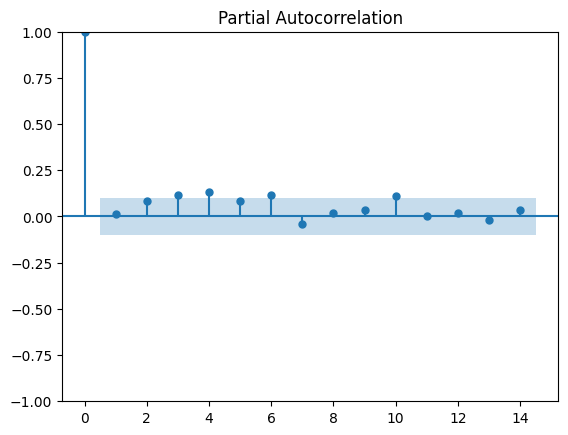

In [39]:
plot_pacf(policy['reddit'], lags=14)
plt.show()

Consider AR(1)

### Correlation between Reddit and Lagged News

In [40]:
for lag in range(1, 14):
    reddit_series = policy['reddit'].iloc[lag:]
    lagged_news_series = policy['news'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(reddit_series, lagged_news_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.1133690561488025, pvalue=0.030581161819963495)
------
Lag: 2
PearsonRResult(statistic=0.037605901638084666, pvalue=0.4750601265821822)
------
Lag: 3
PearsonRResult(statistic=0.03958396868103124, pvalue=0.45275741922326945)
------
Lag: 4
PearsonRResult(statistic=0.053033210644759854, pvalue=0.3149721258674723)
------
Lag: 5
PearsonRResult(statistic=0.09643767107330899, pvalue=0.06759840024891609)
------
Lag: 6
PearsonRResult(statistic=0.013802321997735574, pvalue=0.794387839385665)
------
Lag: 7
PearsonRResult(statistic=0.04112324182591991, pvalue=0.43792893184536164)
------
Lag: 8
PearsonRResult(statistic=-0.01732769063363295, pvalue=0.7442175324815331)
------
Lag: 9
PearsonRResult(statistic=0.011798832854798116, pvalue=0.8244347661640244)
------
Lag: 10
PearsonRResult(statistic=0.017043326892688532, pvalue=0.7489595476834663)
------
Lag: 11
PearsonRResult(statistic=0.0026450216446333684, pvalue=0.9604492279468684)
------
Lag: 12
PearsonRResult(statist

### Run the VAR Model

**With Controls**

In [9]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Load the dataset
policy = pd.read_csv("policy_stat.csv", index_col=0, parse_dates=True)
policy = policy[['news', 'reddit']]

# Create a new column for the day of the week
policy['day_of_week'] = policy.index.dayofweek

# Create dummy variables
dummies = pd.get_dummies(policy['day_of_week'], prefix='day', drop_first=True)

# Concatenate dummy variables with the original dataset
policy = pd.concat([policy, dummies], axis=1)

# Convert boolean dummy variables to numeric
for col in dummies.columns:
    policy[col] = policy[col].astype(int)

# Ensure all columns are numeric
policy = policy.apply(pd.to_numeric, errors='coerce')

# Separate endogenous variables (including dummies)
endog_vars = policy[['news', 'reddit'] + dummies.columns.tolist()]

# Fit the VAR model
model = VAR(endog_vars)
model_fit = model.fit(maxlags=1)

# Capture the summary output as a string
summary_str = StringIO()
sys.stdout = summary_str
print(model_fit.summary())
sys.stdout = sys.__stdout__

# Format the captured text into HTML
html_summary = f"<html><body><pre>{summary_str.getvalue()}</pre></body></html>"

# Save the HTML content to a file
with open('policy_reg.html', 'w') as file:
    file.write(html_summary)

/Volumes/mramn/venvmr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:465: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Granger Causality

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# reddit granger caused by news
reddit_df = pd.DataFrame(columns=['reddit','news'], data=policy)
gc_reddit = grangercausalitytests(reddit_df, 1) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.6294  , p=0.0321  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=4.6679  , p=0.0307  , df=1
likelihood ratio test: chi2=4.6382  , p=0.0313  , df=1
parameter F test:         F=4.6294  , p=0.0321  , df_denom=361, df_num=1


In [25]:
# news granger caused by reddit
news_df = pd.DataFrame(columns=['news','reddit'], data=policy)
gc_news = grangercausalitytests(news_df, 1) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1657  , p=0.2810  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=1.1754  , p=0.2783  , df=1
likelihood ratio test: chi2=1.1735  , p=0.2787  , df=1
parameter F test:         F=1.1657  , p=0.2810  , df_denom=361, df_num=1


## Legal Immigration

### Creating the Time Series

In [ ]:
# legal immigration frame

visa_news = news[news['frame']=='visa']
visa_reddit = reddit[reddit['frame']=='visa']

visa_frame = pd.concat([visa_news, visa_reddit], ignore_index=True)

In [ ]:
# add column called media which is 'news' if column news is not null, 'reddit' otherwise

visa_frame['media'] = visa_frame['news'].apply(lambda x: 'news' if pd.notnull(x) else 'reddit')

In [ ]:
# keep only relevant columns
visa_frame = visa_frame[['date', 'media']]

In [ ]:
# Step 1: Add a count column
visa_frame['count'] = 1

# Step 2: Pivot the data frame
visa = visa_frame.pivot_table(index='date', columns='media', values='count', aggfunc='sum', fill_value=0)

# Step 3: Reset the index to make 'date' a column again (optional, if you prefer it as an index you can skip this)
visa = visa.reset_index()

### Checkpoint: Save Visa Frame

In [ ]:
# save to csv
visa.to_csv("visa_frame.csv", index=False)

### Load Visa Frame

In [3]:
visa = pd.read_csv("visa_frame.csv", index_col=0, parse_dates=True)

In [52]:
visa_results = check_stationarity(visa, ['news', 'reddit'])


Results for news:
ADF Statistic: -3.4736704313720796
p-value: 0.008689607964302558
Critical Value (1%): -3.4489583388155194
Critical Value (5%): -2.869739378430086
Critical Value (10%): -2.5711381780459

Results for reddit:
ADF Statistic: -4.028465588934578
p-value: 0.0012685767829545506
Critical Value (1%): -3.448905534655263
Critical Value (5%): -2.8697161816205705
Critical Value (10%): -2.5711258103550882


### Normalisation

In [4]:
avgs = visa.mean()
devs = visa.std()

for col in visa.columns:
    visa[col] = (visa[col] - avgs.loc[col]) / devs.loc[col]

In [5]:
visa_results = check_stationarity(visa, ['news', 'reddit'])


Results for news:
ADF Statistic: -3.4736704313720668
p-value: 0.008689607964302916
Critical Value (1%): -3.4489583388155194
Critical Value (5%): -2.869739378430086
Critical Value (10%): -2.5711381780459

Results for reddit:
ADF Statistic: -4.028465588934554
p-value: 0.0012685767829546662
Critical Value (1%): -3.448905534655263
Critical Value (5%): -2.8697161816205705
Critical Value (10%): -2.5711258103550882


### CHECKPOINT: Save Stationary Visa Frame

In [6]:
visa.to_csv("visa_stat.csv")

### Load Stationary Visa Frame

In [45]:
visa = pd.read_csv("visa_stat.csv")

In [8]:
visa = visa[['news', 'reddit']]
model = VAR(visa)
lag_order = model.select_order(maxlags=14)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-0.02097,0.001028,0.9792,-0.01222
1,-0.2577,-0.1917,0.7729,-0.2314
2,-0.3216*,-0.2116*,0.7250*,-0.2778*
3,-0.3064,-0.1524,0.7361,-0.2451
4,-0.2956,-0.09764,0.7441,-0.2168
5,-0.2763,-0.03430,0.7586,-0.1800
6,-0.2979,-0.01190,0.7424,-0.1841
7,-0.3020,0.02795,0.7394,-0.1707
8,-0.2859,0.08813,0.7515,-0.1370
9,-0.2834,0.1346,0.7534,-0.1170


### PACF - Reddit

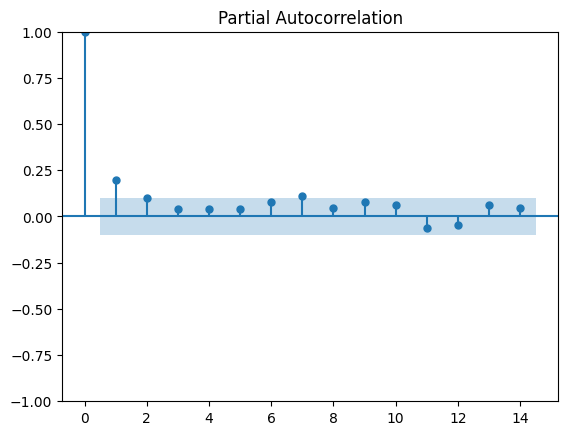

In [9]:
plot_pacf(visa['reddit'], lags=14)
plt.show()

Consider AR(1)

### Correlation between Reddit and Lagged News

Looks like lag 35 

In [13]:
for lag in range(31, 40):
    reddit_series = visa['reddit'].iloc[lag:]
    lagged_news_series = visa['news'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(reddit_series, lagged_news_series))
    print('------')

Lag: 31
PearsonRResult(statistic=-0.08866568218890052, pvalue=0.10576246625751685)
------
Lag: 32
PearsonRResult(statistic=-0.09554361669391218, pvalue=0.08169478601118456)
------
Lag: 33
PearsonRResult(statistic=-0.0996903396331929, pvalue=0.06966001471689899)
------
Lag: 34
PearsonRResult(statistic=-0.08201163466295044, pvalue=0.13650433707820983)
------
Lag: 35
PearsonRResult(statistic=-0.13863483939995308, pvalue=0.011700326420967347)
------
Lag: 36
PearsonRResult(statistic=-0.032221335444351705, pvalue=0.5603182165720386)
------
Lag: 37
PearsonRResult(statistic=-0.09606434023710644, pvalue=0.08235595145331485)
------
Lag: 38
PearsonRResult(statistic=-0.10613918145726514, pvalue=0.05518721570692572)
------
Lag: 39
PearsonRResult(statistic=-0.0158225721871468, pvalue=0.7759472051328571)
------


### Run VAR Model

**With Controls**

In [7]:
visa

,date,news,reddit
0,2023-01-01,-0.453144,0.247225
1,2023-01-02,-0.453144,2.334972
2,2023-01-03,-0.453144,1.639056
3,2023-01-04,-0.453144,0.479197
4,2023-01-05,-0.453144,3.030887
...,...,...,...
360,2023-12-27,-0.181555,0.015253
361,2023-12-28,-0.453144,-0.680663
362,2023-12-29,-0.181555,0.943140
363,2023-12-30,-0.453144,-0.448691


In [10]:
import pandas as pd
from statsmodels.tsa.api import VAR
visa = pd.read_csv("visa_stat.csv")

# Assuming your dataframe 'visa' has a 'date' column in datetime format
visa['date'] = pd.to_datetime(visa['date'])  # Ensure the date column is in datetime format
visa.set_index('date', inplace=True)  # Set the date column as the index

# Generate dummy variables for the day of the week
visa['day_of_week'] = visa.index.dayofweek  # 0=Monday, 1=Tuesday, ..., 6=Sunday
dummies = pd.get_dummies(visa['day_of_week'], prefix='day')

# Drop one dummy variable to avoid multicollinearity (e.g., drop 'day_0' for Monday)
dummies = dummies.drop(columns=['day_0'])

# Combine the original data with the dummy variables
visa_with_dummies = pd.concat([visa[['news', 'reddit']], dummies], axis=1)

# Define the endogenous variables (news and reddit)
endog = visa[['news', 'reddit']]

# Define the exogenous variables (the day of the week dummies)
exog = dummies

# Create and fit the VAR model with exogenous variables
model = VAR(endog, exog=exog)
model_fit = model.fit(maxlags=7)

# Capture the summary output as a string
summary_str = StringIO()
sys.stdout = summary_str
print(model_fit.summary())
sys.stdout = sys.__stdout__

# Format the captured text into HTML
html_summary = f"<html><body><pre>{summary_str.getvalue()}</pre></body></html>"

# Save the HTML content to a file
with open('visa_reg.html', 'w') as file:
    file.write(html_summary)


/Volumes/mramn/venvmr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:465: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Granger Causality

In [16]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# news granger caused by reddit
news_df = pd.DataFrame(columns=['news','reddit'], data=visa)
gc_news = grangercausalitytests(news_df, 7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2735  , p=0.6013  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.2758  , p=0.5995  , df=1
likelihood ratio test: chi2=0.2757  , p=0.5995  , df=1
parameter F test:         F=0.2735  , p=0.6013  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1929  , p=0.8246  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=0.3913  , p=0.8223  , df=2
likelihood ratio test: chi2=0.3911  , p=0.8224  , df=2
parameter F test:         F=0.1929  , p=0.8246  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4933  , p=0.6871  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=1.5091  , p=0.6802  , df=3
likelihood ratio test: chi2=1.5060  , p=0.6809  , df=3
parameter F test:         F=0.4933  , p=0.6871  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.9803  , p=0.4183  

In [39]:
# reddit granger caused by news
reddit_df = pd.DataFrame(columns=['reddit','news'], data=visa)
gc_reddit = grangercausalitytests(reddit_df, 7) 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5329  , p=0.4659  , df_denom=361, df_num=1
ssr based chi2 test:   chi2=0.5373  , p=0.4636  , df=1
likelihood ratio test: chi2=0.5369  , p=0.4637  , df=1
parameter F test:         F=0.5329  , p=0.4659  , df_denom=361, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8105  , p=0.4454  , df_denom=358, df_num=2
ssr based chi2 test:   chi2=1.6437  , p=0.4396  , df=2
likelihood ratio test: chi2=1.6400  , p=0.4404  , df=2
parameter F test:         F=0.8105  , p=0.4454  , df_denom=358, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6694  , p=0.5713  , df_denom=355, df_num=3
ssr based chi2 test:   chi2=2.0477  , p=0.5626  , df=3
likelihood ratio test: chi2=2.0419  , p=0.5637  , df=3
parameter F test:         F=0.6694  , p=0.5713  , df_denom=355, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.4852  , p=0.7466  

## Migrant Boat Arrivals

### Creating the Time Series

In [ ]:
# boat frame

boat_news = news[news['frame']=='boat']
boat_reddit = reddit[reddit['frame']=='boat']

boat_frame = pd.concat([boat_news, boat_reddit], ignore_index=True)

In [ ]:
# add column called media which is 'news' if column news is not null, 'reddit' otherwise

boat_frame['media'] = boat_frame['news'].apply(lambda x: 'news' if pd.notnull(x) else 'reddit')

In [ ]:
# keep only relevant columns
boat_frame = boat_frame[['date', 'media']]

In [ ]:
# Step 1: Add a count column
boat_frame['count'] = 1

# Step 2: Pivot the data frame
boat = boat_frame.pivot_table(index='date', columns='media', values='count', aggfunc='sum', fill_value=0)

# Step 3: Reset the index to make 'date' a column again (optional, if you prefer it as an index you can skip this)
boat = boat.reset_index()

### Checkpoint: Save Boat Frame

In [ ]:
# save to csv
boat.to_csv("boat_frame.csv", index=False)

### Load Boat Frame

In [23]:
boat = pd.read_csv("boat_frame.csv", index_col=0, parse_dates=True)

In [79]:
boat_results = check_stationarity(boat, ['news', 'reddit'])


Results for news:
ADF Statistic: -4.7270422979062285
p-value: 7.484135171870636e-05
Critical Value (1%): -3.4521175397304784
Critical Value (5%): -2.8711265007266666
Critical Value (10%): -2.571877823851692

Results for reddit:
ADF Statistic: -17.860290814697933
p-value: 3.055181670935312e-30
Critical Value (1%): -3.4519023023726696
Critical Value (5%): -2.8710320399170537
Critical Value (10%): -2.57182745012602


### Normalisation

In [24]:
avgs = boat.mean()
devs = boat.std()

for col in boat.columns:
    boat[col] = (boat[col] - avgs.loc[col]) / devs.loc[col]

In [25]:
boat_results = check_stationarity(boat, ['news', 'reddit'])


Results for news:
ADF Statistic: -4.727042297906238
p-value: 7.484135171870353e-05
Critical Value (1%): -3.4521175397304784
Critical Value (5%): -2.8711265007266666
Critical Value (10%): -2.571877823851692

Results for reddit:
ADF Statistic: -17.860290814697926
p-value: 3.055181670935401e-30
Critical Value (1%): -3.4519023023726696
Critical Value (5%): -2.8710320399170537
Critical Value (10%): -2.57182745012602


### CHECKPOINT: Save Stationary Boat Frame

In [26]:
boat.to_csv("boat_stat.csv")

### Load Stationary Boat Frame

In [48]:
boat = pd.read_csv("boat_stat.csv")

In [29]:
boat = boat[['news', 'reddit']]
model = VAR(boat)
lag_order = model.select_order(maxlags=14)
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-0.04546,-0.02034,0.9556,-0.03540
1,-0.3126,-0.2372,0.7316,-0.2824
2,-0.3755*,-0.2499*,0.6869*,-0.3252*
3,-0.3601,-0.1843,0.6976,-0.2897
4,-0.3534,-0.1273,0.7023,-0.2628
5,-0.3387,-0.06233,0.7128,-0.2280
6,-0.3248,0.001757,0.7227,-0.1940
7,-0.3072,0.06961,0.7356,-0.1563
8,-0.2942,0.1328,0.7453,-0.1232
9,-0.2711,0.2062,0.7628,-0.07991


### PACF - Reddit

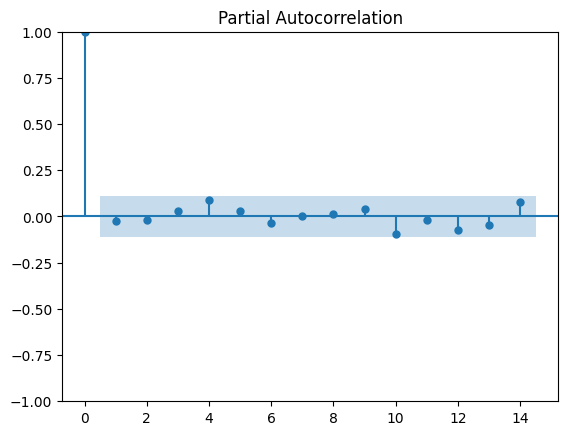

In [30]:
plot_pacf(boat['reddit'], lags=14)
plt.show()

Consider AR(1)

### Correlation between Reddit and Lagged News

In [31]:
for lag in range(1, 12):
    reddit_series = boat['reddit'].iloc[lag:]
    lagged_news_series = boat['news'].iloc[:-lag]
    print('Lag: %s'%lag)
    print(pearsonr(reddit_series, lagged_news_series))
    print('------')

Lag: 1
PearsonRResult(statistic=0.049750968115582855, pvalue=0.3857985278968788)
------
Lag: 2
PearsonRResult(statistic=-0.02379649623309923, pvalue=0.6789179639904516)
------
Lag: 3
PearsonRResult(statistic=-0.014011942860600625, pvalue=0.8077636611717661)
------
Lag: 4
PearsonRResult(statistic=0.018011403573419283, pvalue=0.7548489589234652)
------
Lag: 5
PearsonRResult(statistic=0.07574445836111272, pvalue=0.18927521944807196)
------
Lag: 6
PearsonRResult(statistic=-6.817516521380115e-05, pvalue=0.9990601930919021)
------
Lag: 7
PearsonRResult(statistic=-0.0445566286805034, pvalue=0.4419505296909463)
------
Lag: 8
PearsonRResult(statistic=-0.03842717528428215, pvalue=0.5080165500872731)
------
Lag: 9
PearsonRResult(statistic=-0.039281317956771686, pvalue=0.4993508042402327)
------
Lag: 10
PearsonRResult(statistic=0.06642840534049725, pvalue=0.25377013946205573)
------
Lag: 11
PearsonRResult(statistic=-0.013802219540211342, pvalue=0.81306885465628)
------


### Run VAR Model

**With Controls**

In [11]:
import pandas as pd
from statsmodels.tsa.api import VAR

# Load the dataset
boat = pd.read_csv("boat_stat.csv", index_col=0, parse_dates=True)
boat = boat[['news', 'reddit']]

# Create a new column for the day of the week
boat['day_of_week'] = boat.index.dayofweek

# Create dummy variables
dummies = pd.get_dummies(boat['day_of_week'], prefix='day', drop_first=True)

# Concatenate dummy variables with the original dataset
boat = pd.concat([boat, dummies], axis=1)

# Convert boolean dummy variables to numeric
for col in dummies.columns:
    boat[col] = boat[col].astype(int)

# Ensure all columns are numeric
boat = boat.apply(pd.to_numeric, errors='coerce')

# Separate endogenous variables (including dummies)
endog_vars = boat[['news', 'reddit'] + dummies.columns.tolist()]

# Fit the VAR model
model = VAR(endog_vars)
model_fit = model.fit(maxlags=7)

# Capture the summary output as a string
summary_str = StringIO()
sys.stdout = summary_str
print(model_fit.summary())
sys.stdout = sys.__stdout__

# Format the captured text into HTML
html_summary = f"<html><body><pre>{summary_str.getvalue()}</pre></body></html>"

# Save the HTML content to a file
with open('boat_reg.html', 'w') as file:
    file.write(html_summary)

/Volumes/mramn/venvmr/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:465: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Granger Causality

In [5]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# news granger caused by reddit
news_df = pd.DataFrame(columns=['news','reddit'], data=boat)
gc_news = grangercausalitytests(news_df, 7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0199  , p=0.8878  , df_denom=303, df_num=1
ssr based chi2 test:   chi2=0.0201  , p=0.8872  , df=1
likelihood ratio test: chi2=0.0201  , p=0.8872  , df=1
parameter F test:         F=0.0199  , p=0.8878  , df_denom=303, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5363  , p=0.5855  , df_denom=300, df_num=2
ssr based chi2 test:   chi2=1.0905  , p=0.5797  , df=2
likelihood ratio test: chi2=1.0886  , p=0.5803  , df=2
parameter F test:         F=0.5363  , p=0.5855  , df_denom=300, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4365  , p=0.7270  , df_denom=297, df_num=3
ssr based chi2 test:   chi2=1.3404  , p=0.7196  , df=3
likelihood ratio test: chi2=1.3375  , p=0.7203  , df=3
parameter F test:         F=0.4365  , p=0.7270  , df_denom=297, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2857  , p=0.8872  

In [7]:
# reddit granger caused by news
reddit_df = pd.DataFrame(columns=['reddit','news'], data=boat)
gc_reddit = grangercausalitytests(reddit_df, 7) 



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6866  , p=0.4080  , df_denom=303, df_num=1
ssr based chi2 test:   chi2=0.6934  , p=0.4050  , df=1
likelihood ratio test: chi2=0.6926  , p=0.4053  , df=1
parameter F test:         F=0.6866  , p=0.4080  , df_denom=303, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5504  , p=0.5773  , df_denom=300, df_num=2
ssr based chi2 test:   chi2=1.1192  , p=0.5714  , df=2
likelihood ratio test: chi2=1.1172  , p=0.5720  , df=2
parameter F test:         F=0.5504  , p=0.5773  , df_denom=300, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3781  , p=0.7688  , df_denom=297, df_num=3
ssr based chi2 test:   chi2=1.1611  , p=0.7623  , df=3
likelihood ratio test: chi2=1.1589  , p=0.7629  , df=3
parameter F test:         F=0.3781  , p=0.7688  , df_denom=297, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3119  , p=0.8699  